# Urban simulation assessment

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

## 1.Topological network

In [50]:
# Read the CSV file
df = pd.read_csv('london_flows.csv')

### Betweenness centrality

In [3]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Find the top 10 nodes with the highest betweenness centrality
centrality = nx.betweenness_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Include betweenness centrality values for the top 10 nodes
top_10_nodes_with_betweenness = sorted_centrality[:10]
top_10_nodes_with_betweenness

[('Stratford', 0.09855280271613578),
 ('Liverpool Street', 0.034307268834965696),
 ('Bank and Monument', 0.02795625394929902),
 ('Canary Wharf', 0.02795625394929902),
 ('Canning Town', 0.02775651590896629),
 ('West Ham', 0.02455149590516852),
 ('Highbury & Islington', 0.023023227287027857),
 ('Whitechapel', 0.019682365805384534),
 ('Canada Water', 0.017897771764649517),
 ('Shadwell', 0.017070097362743068)]

#### Non-sequenctial removal (betweenness centrality-LCC)

In [35]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the top 10 centrality nodes one by one and calculate the LCC
lcc_values = []
for i in range(10):
    G.remove_node(top_10_nodes_with_betweenness[i][0])
    lcc = max(nx.connected_components(G), key=len)
    lcc_values.append(len(lcc))

lcc_values

[398, 397, 396, 395, 394, 393, 392, 391, 390, 350]

In [18]:
lcc_values = [398, 397, 396, 395, 394, 393, 392, 391, 390, 350]
lcc_values

[398, 397, 396, 395, 394, 393, 392, 391, 390, 350]

#### Sequenctial removal (betweenness centrality-LCC)

In [19]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the highest-ranked node iteratively and evaluate the impact
lcc_values2 = []
for _ in range(10):

    # Compute degree centrality
    centrality = nx.betweenness_centrality(G)
    
    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the LCC size
    lcc = max(nx.connected_components(G), key=len)
    lcc_values2.append(len(lcc))
    
lcc_values2

[398, 397, 383, 382, 381, 380, 379, 339, 338, 337]

In [20]:
lcc_values2 = [398, 397, 383, 382, 381, 380, 379, 339, 338, 337]
lcc_values2

[398, 397, 383, 382, 381, 380, 379, 339, 338, 337]

#### Non-sequenctial removal (betweenness centrality-diameter)

In [35]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Find the top 10 nodes with the highest betweenness centrality
centrality = nx.betweenness_centrality(G)
top_10_nodes_with_betweenness = sorted(centrality, key=centrality.get, reverse=True)[:10]

# Remove the top 10 centrality nodes one by one and calculate the diameter of the LCC
diameter_values = []
for node in top_10_nodes_with_betweenness:
    G.remove_node(node)
    lcc = max(nx.connected_components(G), key=len)
    lcc_diameter = nx.diameter(G.subgraph(lcc))
    diameter_values.append(lcc_diameter)

diameter_values

[3, 4, 4, 4, 5, 5, 5, 5, 5, 5]

In [36]:
diameter_values = [3, 4, 4, 4, 5, 5, 5, 5, 5, 5]
diameter_values

[3, 4, 4, 4, 5, 5, 5, 5, 5, 5]

#### Sequenctial removal (betweenness centrality-diameter)

In [5]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the highest-ranked node iteratively and evaluate the impact
diameter_values2 = []
for _ in range(10):
    # Compute degree centrality
    centrality = nx.betweenness_centrality(G)

    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the diameter of the LCC
    lcc = max(nx.connected_components(G), key=len)
    lcc_diameter = nx.diameter(G.subgraph(lcc))
    diameter_values2.append(lcc_diameter)
    
diameter_values2

[3, 4, 3, 3, 3, 4, 4, 3, 3, 3]

In [26]:
diameter_values2 = [3, 4, 3, 3, 3, 4, 4, 3, 3, 3]
diameter_values2

[3, 4, 3, 3, 3, 4, 4, 3, 3, 3]

#### Plot

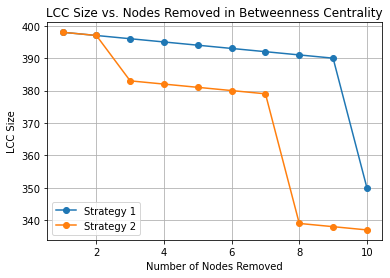

In [21]:
# Largest connected components

# Data for strategy 1
plt.plot(range(1, 11), lcc_values, marker='o', label='Strategy 1')

# Data for strategy 2
plt.plot(range(1, 11), lcc_values2, marker='o', label='Strategy 2')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Size')
plt.title('LCC Size vs. Nodes Removed in Betweenness Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

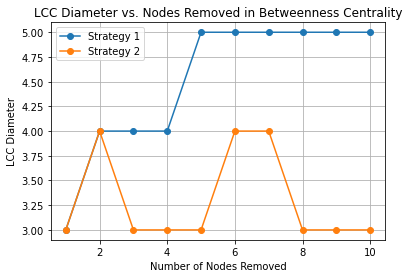

In [27]:
# Diameter

# Data for strategy 1
plt.plot(range(1, 11), diameter_values, marker='o', label='Strategy 1')

# Data for strategy 2
plt.plot(range(1, 11), diameter_values2, marker='o', label='Strategy 2')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Diameter')
plt.title('LCC Diameter vs. Nodes Removed in Betweenness Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

### Closeness centrality

In [28]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Find the top 10 nodes with the highest closeness centrality
centrality = nx.closeness_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Include betweenness centrality values for the top 10 nodes
top_10_nodes_with_closeness = sorted_centrality[:10]
top_10_nodes_with_closeness

[('Stratford', 0.9277389277389277),
 ('Highbury & Islington', 0.8361344537815126),
 ('Whitechapel', 0.8206185567010309),
 ('West Brompton', 0.8172484599589322),
 ('Canada Water', 0.8139059304703476),
 ('Bank and Monument', 0.8105906313645621),
 ('Canary Wharf', 0.8105906313645621),
 ('Richmond', 0.8105906313645621),
 ('Canning Town', 0.8089430894308943),
 ('Liverpool Street', 0.8089430894308943)]

#### Non-Sequenctial removal (closeness centrality-LCC)

In [29]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the top 10 centrality nodes one by one and calculate the LCC
lcc_values = []
for i in range(10):
    G.remove_node(top_10_nodes_with_closeness[i][0])
    lcc = max(nx.connected_components(G), key=len)
    lcc_values.append(len(lcc))

lcc_values

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

In [30]:
lcc_values = [398, 397, 396, 395, 394, 393, 392, 391, 390, 389]
lcc_values

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

#### Sequenctial removal (closeness centrality-LCC)

In [31]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the highest-ranked node iteratively and evaluate the impact
lcc_values2 = []
for _ in range(10):

    # Compute degree centrality
    centrality = nx.closeness_centrality(G)
    
    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the LCC size
    lcc = max(nx.connected_components(G), key=len)
    lcc_values2.append(len(lcc))

lcc_values2

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

In [32]:
lcc_values2 = [398, 397, 396, 395, 394, 393, 392, 391, 390, 389]
lcc_values2

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

#### Non-Sequenctial removal (closeness centrality-diameter)

In [37]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Find the top 10 nodes with the highest betweenness centrality
centrality = nx.closeness_centrality(G)
top_10_nodes_with_betweenness = sorted(centrality, key=centrality.get, reverse=True)[:10]

# Remove the top 10 centrality nodes one by one and calculate the diameter of the LCC
diameter_values = []
for node in top_10_nodes_with_betweenness:
    G.remove_node(node)
    lcc = max(nx.connected_components(G), key=len)
    lcc_diameter = nx.diameter(G.subgraph(lcc))
    diameter_values.append(lcc_diameter)

diameter_values

[3, 3, 3, 3, 4, 4, 4, 4, 4, 5]

In [38]:
diameter_values = [3, 3, 3, 3, 4, 4, 4, 4, 4, 5]
diameter_values

[3, 3, 3, 3, 4, 4, 4, 4, 4, 5]

#### Sequenctial removal (closeness centrality-diameter)

In [39]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the highest-ranked node iteratively and evaluate the impact
diameter_values2 = []
for _ in range(10):
    # Compute degree centrality
    centrality = nx.closeness_centrality(G)

    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the diameter of the LCC
    lcc = max(nx.connected_components(G), key=len)
    lcc_diameter = nx.diameter(G.subgraph(lcc))
    diameter_values2.append(lcc_diameter)
    
diameter_values2

[3, 3, 3, 3, 4, 4, 4, 4, 4, 5]

In [40]:
diameter_values2 = [3, 3, 3, 3, 4, 4, 4, 4, 4, 5]
diameter_values2

[3, 3, 3, 3, 4, 4, 4, 4, 4, 5]

#### Plot

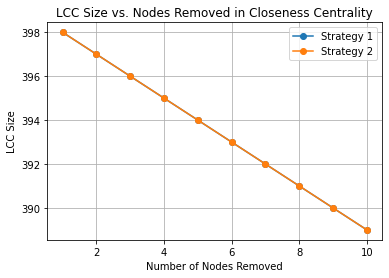

In [41]:
# Largest connected components

# Data for strategy 1
plt.plot(range(1, 11), lcc_values, marker='o', label='Strategy 1')

# Data for strategy 2
plt.plot(range(1, 11), lcc_values2, marker='o', label='Strategy 2')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Size')
plt.title('LCC Size vs. Nodes Removed in Closeness Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

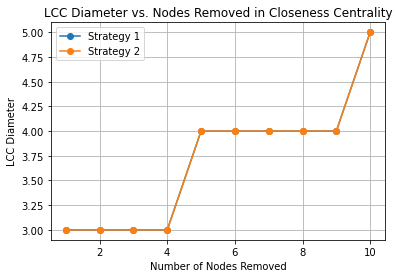

In [42]:
# Diameter

# Data for strategy 1
plt.plot(range(1, 11), diameter_values, marker='o', label='Strategy 1')

# Data for strategy 2
plt.plot(range(1, 11), diameter_values2, marker='o', label='Strategy 2')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Diameter')
plt.title('LCC Diameter vs. Nodes Removed in Closeness Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

### Degree centrality

In [42]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Find the top 10 nodes with the highest closeness centrality
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Include betweenness centrality values for the top 10 nodes
top_10_nodes_with_degree = sorted_centrality[:10]
top_10_nodes_with_degree

[('Stratford', 0.9221105527638191),
 ('Highbury & Islington', 0.8065326633165829),
 ('Whitechapel', 0.7814070351758794),
 ('West Brompton', 0.7763819095477387),
 ('Canary Wharf', 0.771356783919598),
 ('Canada Water', 0.771356783919598),
 ('Liverpool Street', 0.7688442211055276),
 ('Bank and Monument', 0.7663316582914573),
 ('Richmond', 0.7663316582914573),
 ('Canning Town', 0.7638190954773869)]

#### Non-Sequenctial removal (degree centrality-LCC)

In [43]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the top 10 centrality nodes one by one and calculate the LCC
lcc_values = []
for i in range(10):
    G.remove_node(top_10_nodes_with_degree[i][0])
    lcc = max(nx.connected_components(G), key=len)
    lcc_values.append(len(lcc))

lcc_values

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

In [43]:
lcc_values = [398, 397, 396, 395, 394, 393, 392, 391, 390, 389]
lcc_values

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

#### Sequenctial removal (degree centrality-LCC)

In [46]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the highest-ranked node iteratively and evaluate the impact
lcc_values2 = []
for _ in range(10):

    # Compute degree centrality
    centrality = nx.degree_centrality(G)
    
    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the LCC size
    lcc = max(nx.connected_components(G), key=len)
    lcc_values2.append(len(lcc))
    
lcc_values2

[398, 397, 396, 395, 394, 393, 392, 391, 390, 389]

In [ ]:
lcc_values2 = [398, 397, 396, 395, 394, 393, 392, 391, 390, 389]
lcc_values2

#### Non-Sequenctial removal (degree centrality-diameter)

In [44]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Find the top 10 nodes with the highest betweenness centrality
centrality = nx.degree_centrality(G)
top_10_nodes_with_degree = sorted(centrality, key=centrality.get, reverse=True)[:10]

# Remove the top 10 centrality nodes one by one and calculate the diameter of the LCC
diameter_values = []
for node in top_10_nodes_with_degree:
    G.remove_node(node)
    lcc = max(nx.connected_components(G), key=len)
    lcc_diameter = nx.diameter(G.subgraph(lcc))
    diameter_values.append(lcc_diameter)

diameter_values

[3, 3, 3, 3, 3, 4, 5, 5, 5, 5]

In [45]:
diameter_values = [3, 3, 3, 3, 3, 4, 5, 5, 5, 5]
diameter_values

[3, 3, 3, 3, 3, 4, 5, 5, 5, 5]

#### Sequenctial removal (degree centrality-diameter)

In [46]:
# Create the network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination')

# Remove the highest-ranked node iteratively and evaluate the impact
diameter_values2 = []
for _ in range(10):
    # Compute degree centrality
    centrality = nx.degree_centrality(G)

    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the diameter of the LCC
    lcc = max(nx.connected_components(G), key=len)
    lcc_diameter = nx.diameter(G.subgraph(lcc))
    diameter_values2.append(lcc_diameter)
    
diameter_values2

[3, 3, 3, 3, 3, 4, 5, 5, 5, 5]

In [47]:
diameter_values2 = [3, 3, 3, 3, 3, 4, 5, 5, 5, 5]
diameter_values2

[3, 3, 3, 3, 3, 4, 5, 5, 5, 5]

#### Plot

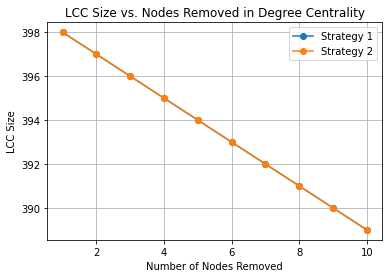

In [47]:
# Data for strategy 1
plt.plot(range(1, 11), lcc_values, marker='o', label='Strategy 1')

# Data for strategy 2
plt.plot(range(1, 11), lcc_values2, marker='o', label='Strategy 2')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Size')
plt.title('LCC Size vs. Nodes Removed in Degree Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

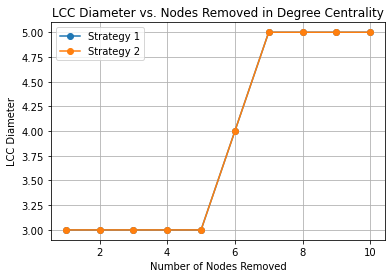

In [48]:
# Diameter

# Data for strategy 1
plt.plot(range(1, 11), diameter_values, marker='o', label='Strategy 1')

# Data for strategy 2
plt.plot(range(1, 11), diameter_values2, marker='o', label='Strategy 2')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Diameter')
plt.title('LCC Diameter vs. Nodes Removed in Degree Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

## 2.Flows: weighted network

### Betweenness

In [60]:
# Create the weighted network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination', edge_attr='flows')

# Normalize edge weights to a range of 0 to 1 (optional, but can help with the calculation)
max_flow = df['flows'].max()
for u, v, d in G.edges(data=True):
    d['weight'] = d['flows'] / max_flow

# Find the top 10 nodes with the highest weighted betweenness centrality
centrality = nx.betweenness_centrality(G, weight='weight')
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Include betweenness centrality values for the top 10 nodes
top_10_nodes_with_weighted_betweenness = sorted_centrality[:10]
top_10_nodes_with_weighted_betweenness

[('West Ham', 1.2271085819629598e+89),
 ('West Brompton', 7.276918941371623e+88),
 ("Shepherd's Bush", 3.576942499080804e+88),
 ('Kew Gardens', 2.073043646238871e+88),
 ('Surrey Quays', 1.0472394952794087e+88),
 ('Kenton', 8.067561689830943e+87),
 ('Richmond', 7.70390682865208e+87),
 ('Willesden Junction', 2.793097215823185e+87),
 ('Kentish Town West', 1.7964701918746222e+87),
 ('Stratford', 1.3623338446430444e+87)]

### Closeness

In [59]:
# Create the weighted network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination', edge_attr='flows')

# Normalize edge weights to range 0 to 1
max_edge_weight = max([edata['flows'] for u, v, edata in G.edges(data=True)])
for u, v, edata in G.edges(data=True):
    edata['normalized_flows'] = edata['flows'] / max_edge_weight
    
# Find the top 10 nodes with the highest weighted betweenness centrality
centrality = nx.closeness_centrality(G, distance='flows')
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Include betweenness centrality values for the top 10 nodes
top_10_nodes_with_weighted_closeness = sorted_centrality[:10]
top_10_nodes_with_weighted_closeness

[('Abbey Road', 5.605633802816901),
 ('Bank and Monument', 5.605633802816901),
 ('Beckton', 5.605633802816901),
 ('Blackwall', 5.605633802816901),
 ('Canary Wharf', 5.605633802816901),
 ('Canning Town', 5.605633802816901),
 ('Crossharbour', 5.605633802816901),
 ('Custom House', 5.605633802816901),
 ('Cutty Sark', 5.605633802816901),
 ('Cyprus', 5.605633802816901)]

### Degree

In [55]:
# Create the weighted network
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination', edge_attr='flows')

# Normalize edge weights to a range of 0 to 1 (optional, but can help with the calculation)
max_flow = df['flows'].max()
for u, v, d in G.edges(data=True):
    d['weight'] = d['flows'] / max_flow

# Find the top 10 nodes with the highest weighted betweenness centrality
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Include betweenness centrality values for the top 10 nodes
top_10_nodes_with_weighted_degree = sorted_centrality[:10]
top_10_nodes_with_weighted_degree

[('Stratford', 0.9221105527638191),
 ('Highbury & Islington', 0.8065326633165829),
 ('Whitechapel', 0.7814070351758794),
 ('West Brompton', 0.7763819095477387),
 ('Canary Wharf', 0.771356783919598),
 ('Canada Water', 0.771356783919598),
 ('Liverpool Street', 0.7688442211055276),
 ('Bank and Monument', 0.7663316582914573),
 ('Richmond', 0.7663316582914573),
 ('Canning Town', 0.7638190954773869)]

### Most important station

In [71]:
# Create the network with edge weights (flow)
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination', edge_attr='flows', create_using=nx.Graph())

def weighted_lcc_total_flow(G):
    lcc_nodes = max(nx.connected_components(G), key=len)
    lcc_subgraph = G.subgraph(lcc_nodes)
    total_flow = sum(edge_data['flows'] for _, _, edge_data in lcc_subgraph.edges(data=True))
    return total_flow

# Remove the highest-ranked node iteratively and evaluate the impact
lcc_values4 = []
highest_ranked_nodes = []
for _ in range(3):

    # Compute degree centrality
    centrality = nx.betweenness_centrality(G, weight='flows')
    
    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)
    highest_ranked_nodes.append(highest_ranked_node)

    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the LCC size
    lcc = max(nx.connected_components(G), key=len)
    lcc_total_flow = weighted_lcc_total_flow(G)
    lcc_values4.append(len(lcc))
    
print(lcc_values4)
print(highest_ranked_nodes)

[398, 397, 396]
['West Ham', 'West Brompton', "Shepherd's Bush"]


In [77]:
lcc_values4 = [398, 397, 396]
highest_ranked_nodes = ['West Ham', 'West Brompton', "Shepherd's Bush"]

In [72]:
# Create the network with edge weights (flow)
G = nx.from_pandas_edgelist(df, source='station_origin', target='station_destination', edge_attr='flows', create_using=nx.Graph())

# Function to calculate weighted diameter
def weighted_diameter(G, weight='flows'):
    path_lengths = nx.all_pairs_dijkstra_path_length(G, weight=weight)
    diameter = max(max(lengths.values()) for _, lengths in path_lengths)
    return diameter

# Remove the highest-ranked node iteratively and evaluate the impact
diameter_values3 = []
highest_ranked_nodes2 = []
for _ in range(3):
    # Compute degree centrality
    centrality = nx.betweenness_centrality(G, weight='flows')

    # Find the highest-ranked node
    highest_ranked_node = max(centrality, key=centrality.get)
    highest_ranked_nodes2.append(highest_ranked_node)
    
    # Remove the highest-ranked node
    G.remove_node(highest_ranked_node)

    # Calculate the diameter of the LCC
    lcc = max(nx.connected_components(G), key=len)
    lcc_subgraph = G.subgraph(lcc)
    lcc_diameter = weighted_diameter(lcc_subgraph, weight='flows')
    diameter_values3.append(lcc_diameter)
    
print(diameter_values3)
print(highest_ranked_nodes2)

[27, 27, 27]
['West Ham', 'West Brompton', "Shepherd's Bush"]


In [78]:
diameter_values3 = [27, 27, 27]
highest_ranked_nodes2 = ['West Ham', 'West Brompton', "Shepherd's Bush"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


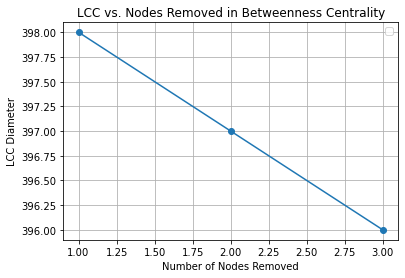

In [81]:
# LCC

# Data for strategy 1
plt.plot(range(1, 4), lcc_values4, marker='o')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Diameter')
plt.title('LCC vs. Nodes Removed in Betweenness Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


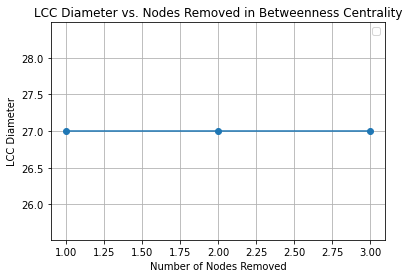

In [83]:
# Diameter

# Data for strategy 1
plt.plot(range(1, 4), diameter_values3, marker='o')

# Labels, title, grid, and legend
plt.xlabel('Number of Nodes Removed')
plt.ylabel('LCC Diameter')
plt.title('LCC Diameter vs. Nodes Removed in Betweenness Centrality')
plt.grid(True)
plt.legend()

# Show the combined graph
plt.show()

## 3. Models and calibration

### Calibration

In [151]:
to_match = ["Amersham", "Wimbledon", "Wimbledon Park", "Angel", "Wood Green", "Wood Lane", "Woodford", "Alperton"]
#subset the data by the 7 sample boroughs
#first the origins
cdatasub = df[df["station_origin"].isin(to_match)]
#then the destinations
cdatasub = cdatasub[df["station_destination"].isin(to_match)]

#now chop out the intra-borough flows
cdatasub = cdatasub[df["station_origin"] != df["station_destination"]]

cdatasub.head(10)

/tmp/ipykernel_117/885244064.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdatasub = cdatasub[df["station_destination"].isin(to_match)]
/tmp/ipykernel_117/885244064.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cdatasub = cdatasub[df["station_origin"] != df["station_destination"]]


,station_origin,station_destination,flows,population,jobs,distance,unconstrainedEst1,log_population,log_jobs,log_distance
852,Alperton,Amersham,0,1624,256,32482.504249,0,7.392648,5.545177,10.388457
853,Alperton,Angel,4,1624,8103,20737.060601,0,7.392648,8.999990,9.939678
1003,Alperton,Wimbledon,37,1624,6295,20660.384504,0,7.392648,8.747511,9.935973
1004,Alperton,Wimbledon Park,1,1624,596,19004.472239,0,7.392648,6.390241,9.852430
1005,Alperton,Wood Green,0,1624,2146,28014.800129,0,7.392648,7.671361,10.240488
1006,Alperton,Wood Lane,0,1624,1578,11320.928597,0,7.392648,7.363914,9.334408
1010,Amersham,Alperton,0,1190,741,32482.504249,0,7.081709,6.608001,10.388457
1011,Amersham,Angel,2,1190,8103,42231.675921,0,7.081709,8.999990,10.650926
1156,Amersham,Wimbledon,0,1190,6295,53142.888753,0,7.081709,8.747511,10.880740
1157,Amersham,Wood Green,0,1190,2146,48332.902090,0,7.081709,7.671361,10.785868


In [152]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat

station_destination,Alperton,Amersham,Angel,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Woodford,All
station_origin,,,,,,,,,
Alperton,NaN,0.0,4.0,37.0,1.0,0.0,0.0,NaN,42
Amersham,0.0,NaN,2.0,0.0,NaN,0.0,4.0,NaN,6
Angel,0.0,0.0,NaN,1.0,0.0,3.0,14.0,0.0,18
Wimbledon,8.0,0.0,2.0,NaN,227.0,1.0,5.0,0.0,243
Wimbledon Park,0.0,NaN,0.0,543.0,NaN,0.0,0.0,NaN,543
Wood Green,3.0,0.0,41.0,27.0,1.0,NaN,3.0,0.0,75
Wood Lane,0.0,0.0,4.0,7.0,NaN,0.0,NaN,NaN,11
Woodford,NaN,NaN,22.0,2.0,NaN,1.0,NaN,NaN,25
All,11.0,0.0,75.0,617.0,229.0,5.0,26.0,0.0,963


In [153]:
#set up some variables to hold our parameter values in:
alpha = 1
gamma = 1
beta = 2
k = 1
T2 = sum(cdatasub["flows"])

In [154]:
Oi1_alpha = cdatasub["population"]**alpha
Dj2_gamma = cdatasub["jobs"]**gamma
dist_beta = cdatasub["distance"]**-beta
T1 = Oi1_alpha*Dj2_gamma*dist_beta
k = T2/sum(T1)

In [155]:
#run the model and store of the new flow estimates in a new column
cdatasub["unconstrainedEst1"] = round(k*Oi1_alpha*Dj2_gamma*dist_beta, 0)
#convert to integers
cdatasub["unconstrainedEst1"] = cdatasub["unconstrainedEst1"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrainedEst1"])

962

In [156]:
cdatasubmat1 = cdatasub.pivot_table(values ="unconstrainedEst1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat1

station_destination,Alperton,Amersham,Angel,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Woodford,All
station_origin,,,,,,,,,
Alperton,NaN,0.0,4.0,3.0,0.0,1.0,3.0,NaN,11
Amersham,0.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,1
Angel,1.0,0.0,NaN,11.0,1.0,13.0,10.0,1.0,37
Wimbledon,2.0,0.0,24.0,NaN,208.0,3.0,9.0,1.0,247
Wimbledon Park,0.0,NaN,7.0,516.0,NaN,1.0,3.0,NaN,527
Wood Green,1.0,0.0,79.0,9.0,1.0,NaN,5.0,1.0,96
Wood Lane,1.0,0.0,13.0,5.0,NaN,1.0,NaN,NaN,20
Woodford,NaN,NaN,16.0,4.0,NaN,3.0,NaN,NaN,23
All,5.0,0.0,144.0,548.0,210.0,22.0,30.0,3.0,962


In [157]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(cdatasub["flows"], cdatasub["unconstrainedEst1"])

0.9869384593942873

In [158]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(cdatasub["flows"], cdatasub["unconstrainedEst1"])

10.542

In [159]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

#create the formula
formula = 'flows ~ log_population + log_jobs + log_distance'

#run the regression
uncosim = smf.glm(formula = formula, 
                  data=cdatasub, 
                  family=sm.families.Poisson()).fit()


In [160]:
#extract the summary of the constrained model
print(uncosim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                   45
Model:                            GLM   Df Residuals:                       41
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -195.56
Date:                Tue, 09 May 2023   Deviance:                       302.31
Time:                        08:45:52   Pearson chi2:                     531.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.9924      0.895     10.

In [112]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3]

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdatasub["unconstrainedEst2"] = np.exp(K 
                                       + alpha*cdatasub["log_population"] 
                                       + gamma*cdatasub["log_jobs"] 
                                       - beta*cdatasub["log_distance"])

#or we can just extract the results from the actual poisson regression and apply them to the data
predictions = uncosim.get_prediction()
predictions_summary_frame = predictions.summary_frame()
cdatasub["fitted"] = predictions_summary_frame["mean"]

In [113]:
uncosim.mu

array([1.22449047e-01, 4.54126543e+00, 3.74614076e+00, 6.83618523e-01,
       8.80026471e-01, 4.07873575e+00, 2.31077923e-01, 9.16380197e-01,
       4.78197094e-01, 2.45842311e-01, 2.33789695e-01, 1.28336775e+00,
       1.37229312e-01, 9.21638390e+00, 1.72538321e+00, 1.33725424e+01,
       1.09760878e+01, 1.63250384e+00, 1.82545431e+00, 1.23478335e-01,
       1.58918038e+01, 2.16773035e+02, 2.85323353e+00, 7.89539385e+00,
       6.74434324e-01, 8.25326666e-01, 7.37094868e+00, 5.37069436e+02,
       1.25075363e+00, 3.93446160e+00, 9.66141131e-01, 1.43020542e-01,
       5.19498841e+01, 6.42828730e+00, 1.13737729e+00, 4.84900314e+00,
       1.45310690e+00, 1.72061942e+00, 5.22614640e-02, 1.63844771e+01,
       6.83512050e+00, 1.86323177e+00, 1.24112968e+01, 2.97365086e+00,
       2.84374020e+00])

In [114]:
#round the numbers so that we don't get a half of a person
cdatasub["unconstrainedEst2"] = round(cdatasub["unconstrainedEst2"], 0)
#convert to integers
cdatasub["unconstrainedEst2"] = cdatasub["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(cdatasub["unconstrainedEst2"])

962

In [117]:
#turn it into a little matrix and have a look at your handy work
cdatasubmat2 = cdatasub.pivot_table(values ="unconstrainedEst2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat2

station_destination,Alperton,Amersham,Angel,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Woodford,All
station_origin,,,,,,,,,
Alperton,NaN,0.0,5.0,4.0,1.0,1.0,4.0,NaN,15
Amersham,0.0,NaN,1.0,0.0,NaN,0.0,0.0,NaN,1
Angel,1.0,0.0,NaN,9.0,2.0,13.0,11.0,2.0,38
Wimbledon,2.0,0.0,16.0,NaN,217.0,3.0,8.0,1.0,247
Wimbledon Park,1.0,NaN,7.0,537.0,NaN,1.0,4.0,NaN,550
Wood Green,1.0,0.0,52.0,6.0,1.0,NaN,5.0,1.0,66
Wood Lane,2.0,0.0,16.0,7.0,NaN,2.0,NaN,NaN,27
Woodford,NaN,NaN,12.0,3.0,NaN,3.0,NaN,NaN,18
All,7.0,0.0,109.0,566.0,221.0,23.0,32.0,4.0,962


In [118]:
#compare it to the actual flows
cdatasubmat

station_destination,Alperton,Amersham,Angel,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Woodford,All
station_origin,,,,,,,,,
Alperton,NaN,0.0,4.0,37.0,1.0,0.0,0.0,NaN,42
Amersham,0.0,NaN,2.0,0.0,NaN,0.0,4.0,NaN,6
Angel,0.0,0.0,NaN,1.0,0.0,3.0,14.0,0.0,18
Wimbledon,8.0,0.0,2.0,NaN,227.0,1.0,5.0,0.0,243
Wimbledon Park,0.0,NaN,0.0,543.0,NaN,0.0,0.0,NaN,543
Wood Green,3.0,0.0,41.0,27.0,1.0,NaN,3.0,0.0,75
Wood Lane,0.0,0.0,4.0,7.0,NaN,0.0,NaN,NaN,11
Woodford,NaN,NaN,22.0,2.0,NaN,1.0,NaN,NaN,25
All,11.0,0.0,75.0,617.0,229.0,5.0,26.0,0.0,963


In [120]:
CalcRSqaured(cdatasub["flows"], cdatasub["unconstrainedEst2"])

0.9923714939435032

In [122]:
CalcRMSE(cdatasub["flows"], cdatasub["unconstrainedEst2"])

7.576

In [123]:
#now we can create a pivot table to turn paired list into a matrix, and compute the margin as well
cdatasubmat_new = pd.pivot_table(df, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat_new

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [124]:
uncosim.params

Intercept         8.992431
log_population    0.661779
log_jobs          0.791131
log_distance     -1.960999
dtype: float64

## 4.Scenario

### Scenario A

In [210]:
alpha = 0.661779
beta = 0.791131
gamma = -1.960999
k = 8.992431

def gravity_model(flow_data, alpha, beta, gamma, k):
    flow_data['predicted_flows_scenario_A'] = k * (flow_data['population'] ** alpha) * (flow_data['jobs'] ** beta) / (flow_data['distance'] ** gamma)
    return flow_data

# Read the CSV file
data = pd.read_csv("london_flows.csv")

# Update the jobs in Canary Wharf
canary_wharf_id = 'Canary Wharf' 
data.loc[data['station_destination'] == canary_wharf_id, 'jobs'] *= 0.5

# Compute the new interaction flows using the calibrated parameters
predicted_data = gravity_model(data, alpha, beta, gamma, k)

# Adjust the flows to ensure the total number of commuters is conserved
total_commuters_before = data['flows'].sum()
total_commuters_after = predicted_data['predicted_flows_scenario_A'].sum()
scaling_factor = total_commuters_before / total_commuters_after

predicted_data['predicted_flows_scenario_A'] *= scaling_factor

# Print the updated dataset with new flows
predicted_data


,station_origin,station_destination,flows,population,jobs,distance,predicted_flows_scenario_A
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,18.531799
1,Abbey Road,Beckton,1,599,442,8510.121774,0.336397
2,Abbey Road,Blackwall,3,599,665,3775.448872,0.094413
3,Abbey Road,Canary Wharf,1,599,29386,5086.514220,3.392716
4,Abbey Road,Canning Town,37,599,15428,2228.923167,0.404100
...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,22.372974
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,14.198745
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,2.140811
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,1.303328


In [211]:
new_df = predicted_data[['station_origin', 'station_destination', 'flows', 'predicted_flows_scenario_A']]
new_df

,station_origin,station_destination,flows,predicted_flows_scenario_A
0,Abbey Road,Bank and Monument,0,18.531799
1,Abbey Road,Beckton,1,0.336397
2,Abbey Road,Blackwall,3,0.094413
3,Abbey Road,Canary Wharf,1,3.392716
4,Abbey Road,Canning Town,37,0.404100
...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,22.372974
61470,Woolwich Arsenal,West Ham,608,14.198745
61471,Woolwich Arsenal,West India Quay,6,2.140811
61472,Woolwich Arsenal,West Silvertown,81,1.303328


### Scenario B

In [196]:
# Replace these with the actual values of your calibrated parameters
alpha = 0.661779
beta = 0.791131
gamma = -1.960999
k = 8.992431

def gravity_model(flow_data, alpha, beta, gamma, k):
    flow_data['predicted_flows'] = k * (flow_data['population'] ** alpha) * (flow_data['jobs'] ** beta) / (flow_data['distance'] ** gamma)
    return flow_data

# Read the CSV file
data = pd.read_csv("london_flows.csv")

# Scenario B: High increase in the importance of jobs
beta_scenario2 = beta * 2  # Double the beta value
predicted_data_scenario_B = gravity_model(data.copy(), alpha, beta_scenario2, gamma, k)
predicted_data_scenario_B.rename(columns={'predicted_flows': 'predicted_flows_scenario_B'}, inplace=True)

# Combine the results of both scenarios into a single DataFrame
result = pd.concat([data, predicted_data_scenario_B['predicted_flows_scenario_B']], axis=1)

# Print the updated dataset with new flows
result


,station_origin,station_destination,flows,population,jobs,distance,predicted_flows_scenario_B
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,1.603830e+18
1,Abbey Road,Beckton,1,599,442,8510.121774,4.833605e+14
2,Abbey Road,Blackwall,3,599,665,3775.448872,1.874110e+14
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,4.039090e+17
4,Abbey Road,Canning Town,37,599,15428,2228.923167,9.650152e+15
...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,1.593007e+17
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,1.496570e+17
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,2.842444e+15
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,3.266683e+15


In [197]:
new_df2 = result[['station_origin', 'station_destination', 'flows', 'predicted_flows_scenario_B']]
new_df2

,station_origin,station_destination,flows,predicted_flows_scenario_B
0,Abbey Road,Bank and Monument,0,1.603830e+18
1,Abbey Road,Beckton,1,4.833605e+14
2,Abbey Road,Blackwall,3,1.874110e+14
3,Abbey Road,Canary Wharf,1,4.039090e+17
4,Abbey Road,Canning Town,37,9.650152e+15
...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,1.593007e+17
61470,Woolwich Arsenal,West Ham,608,1.496570e+17
61471,Woolwich Arsenal,West India Quay,6,2.842444e+15
61472,Woolwich Arsenal,West Silvertown,81,3.266683e+15


In [199]:
# Replace these with the actual values of your calibrated parameters
alpha = 0.661779
beta = 0.791131
gamma = -1.960999
k = 8.992431

def gravity_model(flow_data, alpha, beta, gamma, k):
    flow_data['predicted_flows'] = k * (flow_data['population'] ** alpha) * (flow_data['jobs'] ** beta) / (flow_data['distance'] ** gamma)
    return flow_data

# Read the CSV file
data = pd.read_csv("london_flows.csv")

# Scenario B: High increase in transport cost
gamma_scenario2 = gamma * 2  # Double the gamma value
predicted_data_scenario2 = gravity_model(data.copy(), alpha, beta, gamma_scenario2, k)
predicted_data_scenario2.rename(columns={'predicted_flows': 'predicted_flows_scenario_B2'}, inplace=True)

# Combine the results of both scenarios into a single DataFrame
result2 = pd.concat([data, predicted_data_scenario2['predicted_flows_scenario_B2']], axis=1)

# Print the updated dataset with new flows
result2


,station_origin,station_destination,flows,population,jobs,distance,predicted_flows_scenario_B2
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,1.000701e+22
1,Abbey Road,Beckton,1,599,442,8510.121774,1.986075e+20
2,Abbey Road,Blackwall,3,599,665,3775.448872,1.132414e+19
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,1.263372e+21
4,Abbey Road,Canning Town,37,599,15428,2228.923167,1.724423e+19
...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,3.218321e+22
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.756465e+21
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,1.580226e+21
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,3.102630e+20


In [201]:
new_df3 = result2[['station_origin', 'station_destination', 'flows', 'predicted_flows_scenario_B2']]
new_df3

,station_origin,station_destination,flows,predicted_flows_scenario_B2
0,Abbey Road,Bank and Monument,0,1.000701e+22
1,Abbey Road,Beckton,1,1.986075e+20
2,Abbey Road,Blackwall,3,1.132414e+19
3,Abbey Road,Canary Wharf,1,1.263372e+21
4,Abbey Road,Canning Town,37,1.724423e+19
...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,3.218321e+22
61470,Woolwich Arsenal,West Ham,608,8.756465e+21
61471,Woolwich Arsenal,West India Quay,6,1.580226e+21
61472,Woolwich Arsenal,West Silvertown,81,3.102630e+20


### Scenario C

In [216]:
Final = pd.concat([ new_df, predicted_data['jobs'],new_df2['predicted_flows_scenario_B'], new_df3['predicted_flows_scenario_B2']], axis=1)

In [222]:
# select rows based on value of multiple columns
canary_wharf = Final.loc[(Final['station_origin'] == 'Canary Wharf')]

# select columns to display
columns_to_display = ['station_origin', 'station_destination', 'flows',
                      'predicted_flows_scenario_A', 'jobs',
                      'predicted_flows_scenario_B', 'predicted_flows_scenario_B2']

# display selected rows and columns
canary_wharf[columns_to_display].head(60)

,station_origin,station_destination,flows,predicted_flows_scenario_A,jobs,predicted_flows_scenario_B,predicted_flows_scenario_B2
8805,Canary Wharf,Abbey Road,2,0.835369,345,9.866628e+14,1.797661e+20
8806,Canary Wharf,Acton Town,7,55.151167,2202,2.822957e+17,1.808014e+23
8807,Canary Wharf,Aldgate,0,16.207854,7782,2.252328e+17,5.751577e+21
8808,Canary Wharf,Aldgate East,3,10.138440,7932,1.430332e+17,2.216759e+21
8809,Canary Wharf,All Saints,27,0.074572,444,1.075343e+14,1.173346e+18
8810,Canary Wharf,Alperton,1,35.740177,741,7.728622e+16,1.797256e+23
8811,Canary Wharf,Amersham,0,58.100316,256,5.419447e+16,1.101089e+24
8812,Canary Wharf,Angel,24,28.023561,8103,4.020846e+17,1.665308e+22
8813,Canary Wharf,Archway,5,28.011528,2193,1.429155e+17,4.679217e+22
8814,Canary Wharf,Arnos Grove,1,21.943550,748,4.780604e+16,6.724808e+22
